<h1>Random Texture Generation</h4>

The model will be trained to find symmetries on procedurally generated images. Generating symmetries from digits was a straightforward task, but also straightforward to predict. Distractions are necessary alongside the image. 

Next textures will be generated from noise to apply as background for the images.

Texture Generation using Random Noise: 
https://lodev.org/cgtutor/randomnoise.html

In [68]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

<h2>Noise</h2>
Function <code>addNoise</code> adds random UINT-8 values to an image, the result is however too caothic to use as background for the experiment.

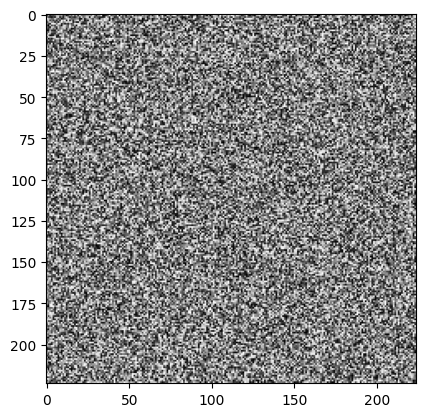

In [69]:
# Adds noise filter to image
def addNoise(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[0]):
            pixelMask = random.uniform(0,1)
            img[i][j][0] += int(255 * pixelMask)
            img[i][j][1] += int(255 * pixelMask)
            img[i][j][2] += int(255 * pixelMask)
    
    return img

# Creating black image
noise = np.zeros((224,224,3)).astype(np.uint8)
# Adding noise
addNoise(noise)

# Display
plt.imshow(noise)


<h2>Smooth Noise</h2>
Standard noise seems "too random" since the pixels are selected by asigning random values to the pixels. To reduce the randomness of the generated image, context is given to the neighbouring pixels to smooth the image. Function <code>smoothImage</code> does just that.

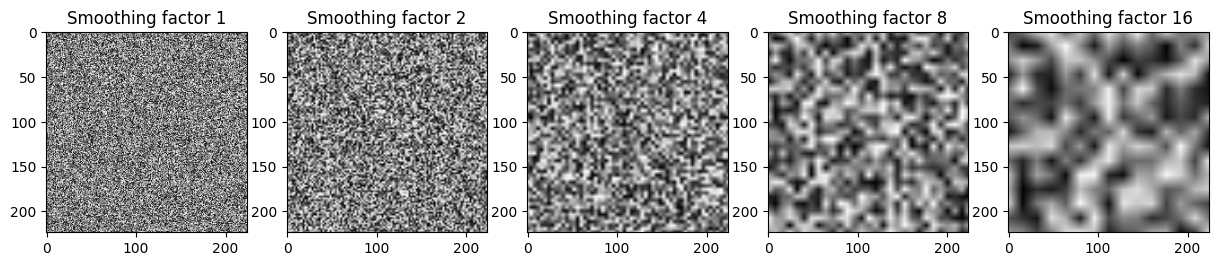

In [70]:
# Generates smooth noise
def smoothNoise(x, y, img):
    width = img.shape[1]
    height = img.shape[0]

    # Get decimal part for x and y
    fractX = x - int(x)
    fractY = y - int(y)

    # Wrap around
    x1 = (int(x) + width) % width
    y1 = (int(y) + height) % height

    # Neighbour values
    x2 = (x1 + width - 1) % width
    y2 = (y1 + height -1) % height

    # Smooth noise
    value = 0.0
    value += fractX * fractY * img[y1][x1][0]
    value += (1 - fractX) * fractY * img[y1][x2][0]
    value += fractX * (1 - fractY) * img[y2][x1][0]
    value += (1 - fractX) * (1 - fractY) * img[y2][x2][0]

    return value

# Smooth the image to desired factor
def smoothImage(img,factor):
    result = np.zeros(img.shape).astype(np.uint8)

    # Applies smooth noise
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            res = int(smoothNoise(i/ factor, j / factor, img))
            result[i][j][0] = res
            result[i][j][1] = res
            result[i][j][2] = res

    return result

# Smoothing with different factors
smooth = []
for i in range(5):
    smooth.append(smoothImage(noise, 2**i))


# Display
_, ax = plt.subplots(1,5, figsize=(15, 5))
for i in range(5):
    ax[i].imshow(smooth[i]), ax[i].set_title(f'Smoothing factor {2**i}')



<h2>Adding Smooth Noise together</h2>
Smooth noise is significantly better than standard noise, however it is still possible to make it more visually apealing. Adding different smoothing noises obtained from the same initial noise will produce a kind of granite texture.

To accomplish this an initial smoothinf factor is chosen, as a power of 2, each image is added to the previous one dividing the factor by 2. The lower the factor the darker the image will be. Starting with higher factors leads to more smoke-like textures.

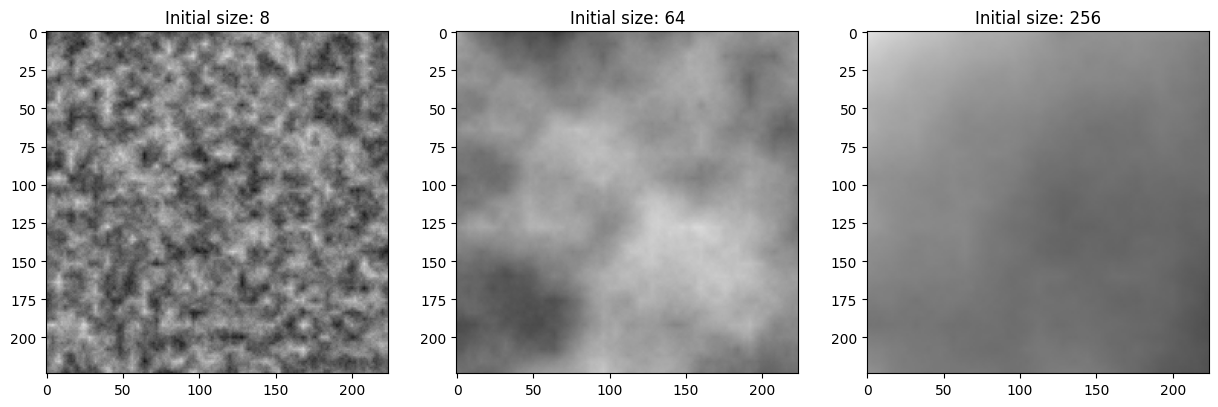

In [71]:
# Returns the value for the turbulence pixel
def turbulence(x, y, size, img):
    value = 0
    initialSize = size

    while size >= 1:
        value += (smoothNoise(x / size, y / size, img) / 256) * size
        size = size//2
    
    return  128 * value / initialSize

# Applies turbulence
def applyTurbulence(img, initialSize):
    turb = np.zeros(img.shape).astype(np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            res = int(turbulence(i, j, initialSize, img))
            turb[i][j][0] = res
            turb[i][j][1] = res
            turb[i][j][2] = res

    return turb

# Creating standard noise
turb8 = np.zeros(noise.shape).astype(np.uint8)
turb64 = np.zeros(noise.shape).astype(np.uint8)
turb256 = np.zeros(noise.shape).astype(np.uint8)
addNoise(turb8)
addNoise(turb64)
addNoise(turb256)
# Applying turbulence with diferent initial sizes
turb8 = applyTurbulence(turb8, 8)
turb64 = applyTurbulence(turb64, 64)
turb256 = applyTurbulence(turb256, 256)

# Display
fig, ax = plt.subplots(1,3,figsize=(15, 5))
ax[0].imshow(turb8), ax[0].set_title('Initial size: 8')
ax[1].imshow(turb64), ax[1].set_title('Initial size: 64')
ax[2].imshow(turb256), ax[2].set_title('Initial size: 256')
plt.show()

<h2>Sin function</h2>
If the pixels are set as following the function <i><b>pixel(x,y) = 255 * sin(x+y)</b></i> a striping set appears, factors can be multiplied to the x and y to variate the number and direction of the stripes. If the sin is raised to a power the distance between the lines increases.

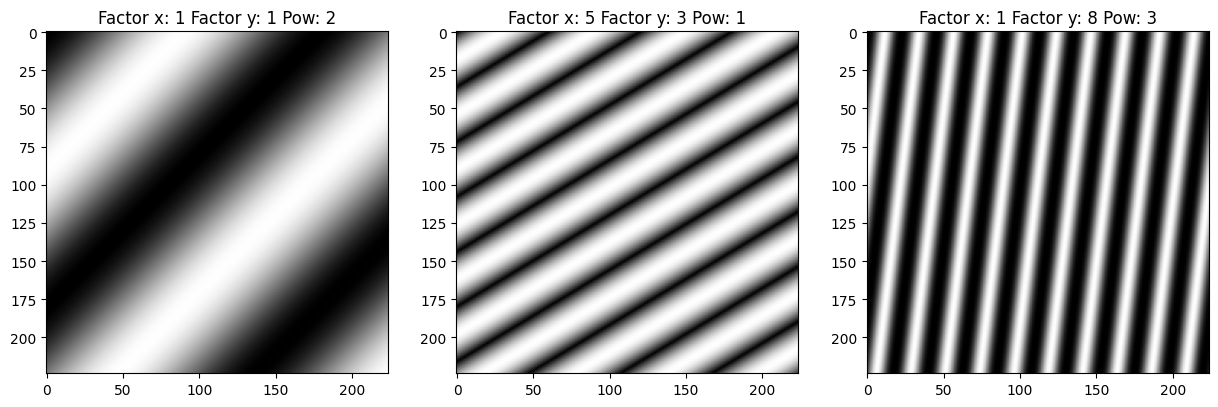

In [72]:
# Returns the sin texture
def sinTexture(shape, factorX, factorY, power):
    img = np.zeros(shape).astype(np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = int(255 * abs(math.sin(math.radians(i*factorX+j*factorY))) ** power)
            img[i,j][0] = val
            img[i,j][1] = val
            img[i,j][2] = val
    
    return img

# Applying turbulence with diferent initial sizes
img1 = sinTexture((224,224,3),1,1,2)
img2 = sinTexture((224,224,3),5,3,1)
img3 = sinTexture((224,224,3),1,8,3)

# Display
_, ax = plt.subplots(1,3,figsize=(15, 5))
ax[0].imshow(img1), ax[0].set_title('Factor x: 1 Factor y: 1 Pow: 2')
ax[1].imshow(img2), ax[1].set_title('Factor x: 5 Factor y: 3 Pow: 1')
ax[2].imshow(img3), ax[2].set_title('Factor x: 1 Factor y: 8 Pow: 3')
plt.show()

<h2> Random sin texture </h2>
If the sin texture is mixed with the smooth sin function the paths are altered.

Im1: {'Darkness': 1, 'xPeriod': 4, 'yPeriod': 4, 'turbPower': 1.5, 'turbSize': 64}
Im2: {'Darkness': 1, 'xPeriod': 7, 'yPeriod': 3, 'turbPower': 3, 'turbSize': 32}
Im3: {'Darkness': 1, 'xPeriod': 10, 'yPeriod': 10, 'turbPower': 3, 'turbSize': 16}


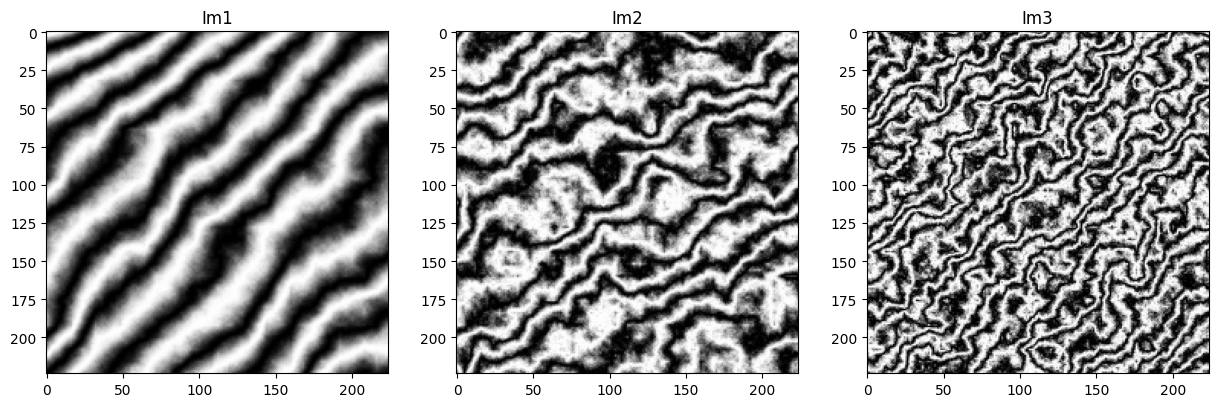

In [78]:
# Returns random smooth sin texture
def getSmoothNoiseSin(shape, darkness = None, xPeriod = None, yPeriod = None, turbPower = None, turbSize = None):
    if darkness is None:
        darkness = random.uniform(0,0.8)
    if xPeriod is None:
        xPeriod	= random.randrange(10)
    if yPeriod is None:
        yPeriod	= random.randrange(10)
    if turbPower is None:
        turbPower = random.uniform(0,3)
    if turbSize is None:
        turbSize = 2**random.randrange(2,7)
    
    noise = np.zeros(shape).astype(np.uint8)
    noise = addNoise(noise)

    img = np.zeros((224,224,3)).astype(np.uint8)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            xyValue = i * xPeriod + j * yPeriod + (turbPower * turbulence(i,j, turbSize, noise))
            sineValue = 255 * abs(math.sin(math.radians(xyValue)))**2 * darkness
            img[i,j][0] = sineValue
            img[i,j][1] = sineValue
            img[i,j][2] = sineValue

    return img, {'Darkness':darkness, 'xPeriod':xPeriod, 'yPeriod':yPeriod, 'turbPower':turbPower, 'turbSize':turbSize}

img1,d1 = getSmoothNoiseSin((224,224,3),1, 4, 4, 1.5, 64)
img2,d2 = getSmoothNoiseSin((224,224,3),1, 7, 3, 3, 32)
img3,d3 = getSmoothNoiseSin((224,224,3),1, 10, 10, 3, 16)

# Display
print("Im1:",d1)
print("Im2:",d2)
print("Im3:",d3)
_, ax = plt.subplots(1,3,figsize=(15, 5))
ax[0].imshow(img1), ax[0].set_title('Im1')
ax[1].imshow(img2), ax[1].set_title('Im2')
ax[2].imshow(img3), ax[2].set_title('Im3')
plt.show()

<h2>Wood Cross Section Texture</h2>
If the pixels are set as following the function <i><b>pixel(x,y) = 255 * sin(x+y)</b></i> a striping set appears, factors can be multiplied to the x and y to variate the number and direction of the stripes. If the sin is raised to a power the distance between the lines increases. !! CHANGE THIS !!

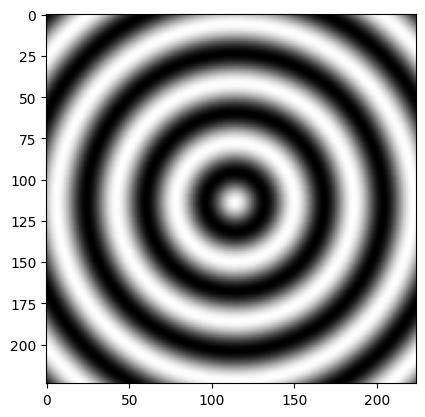

In [74]:
# Returns the wood texture
def woodTexture(shape, factorX, factorY, offsetX, offsetY, power):
    img = np.zeros(shape).astype(np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = int(255 * abs(math.cos(math.radians(    math.sqrt(((i+offsetX)*factorX)**2+((j+offsetY)*factorY)**2)     ))) ** power)
            img[i,j][0] = val
            img[i,j][1] = val
            img[i,j][2] = val
    
    return img

img = woodTexture((224,224,3),5,5, -114, -114,2)
plt.imshow(img)

Im1: {'Darkness': 1, 'xPeriod': 3, 'yPeriod': 8, 'turbPower': 1.7635040282984495, 'turbSize': 64, 'offsetX': -1, 'offsetY': -135}
Im2: {'Darkness': 1, 'xPeriod': 6, 'yPeriod': 5, 'turbPower': 1.4383828503553044, 'turbSize': 8, 'offsetX': -77, 'offsetY': -76}
Im3: {'Darkness': 1, 'xPeriod': 5, 'yPeriod': 2, 'turbPower': 1.4050340214216281, 'turbSize': 8, 'offsetX': -184, 'offsetY': -71}


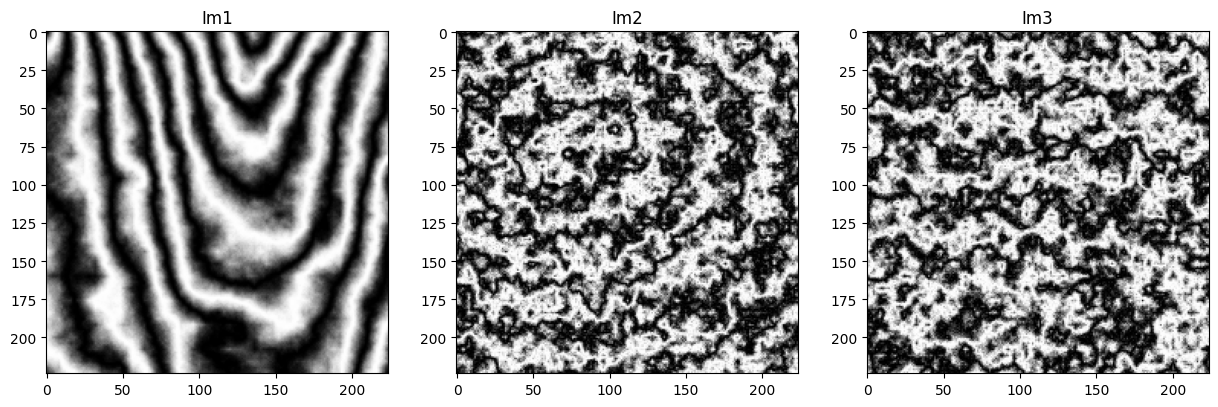

In [83]:
# Returns random smooth sin texture
def getSmoothNoiseWood(shape, offsetX = None, offsetY = None, darkness = None, xPeriod = None, yPeriod = None, turbPower = None, turbSize = None):
    if darkness is None:
        darkness = random.uniform(0,0.8)
    if xPeriod is None:
        xPeriod	= random.randrange(10)
    if yPeriod is None:
        yPeriod	= random.randrange(10)
    if turbPower is None:
        turbPower = random.uniform(0,3)
    if turbSize is None:
        turbSize = 2**random.randrange(2,7)
    if offsetX is None:
        offsetX = -random.randrange(shape[0])
    if offsetY is None:
        offsetY = -random.randrange(shape[0])
    
    noise = np.zeros(shape).astype(np.uint8)
    noise = addNoise(noise)

    img = np.zeros((224,224,3)).astype(np.uint8)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            xyValue = math.sqrt(((i+offsetX)*xPeriod)**2+((j+offsetY)*yPeriod)**2) + (turbPower * turbulence(i,j, turbSize, noise))
            sineValue = 255 * abs(math.sin(math.radians(xyValue)))**2 * darkness
            img[i,j][0] = sineValue
            img[i,j][1] = sineValue
            img[i,j][2] = sineValue

    return img, {'Darkness':darkness, 'xPeriod':xPeriod, 'yPeriod':yPeriod, 'turbPower':turbPower, 'turbSize':turbSize, 'offsetX':offsetX, 'offsetY':offsetY}

# img = getSmoothNoiseWood((224,224,8),offsetX=-124, offsetY=-75, darkness=1, xPeriod=5, yPeriod=5, turbPower=1, turbSize=64)
img1,d1 = getSmoothNoiseWood((224,224,8), darkness=1)
img2,d2 = getSmoothNoiseWood((224,224,8), darkness=1)
img3,d3 = getSmoothNoiseWood((224,224,8), darkness=1)

# Display
print("Im1:",d1)
print("Im2:",d2)
print("Im3:",d3)
_, ax = plt.subplots(1,3,figsize=(15, 5))
ax[0].imshow(img1), ax[0].set_title('Im1')
ax[1].imshow(img2), ax[1].set_title('Im2')
ax[2].imshow(img3), ax[2].set_title('Im3')
plt.show()